<a href="https://colab.research.google.com/github/MeghaBharti/Deep_Learning/blob/main/Basic/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

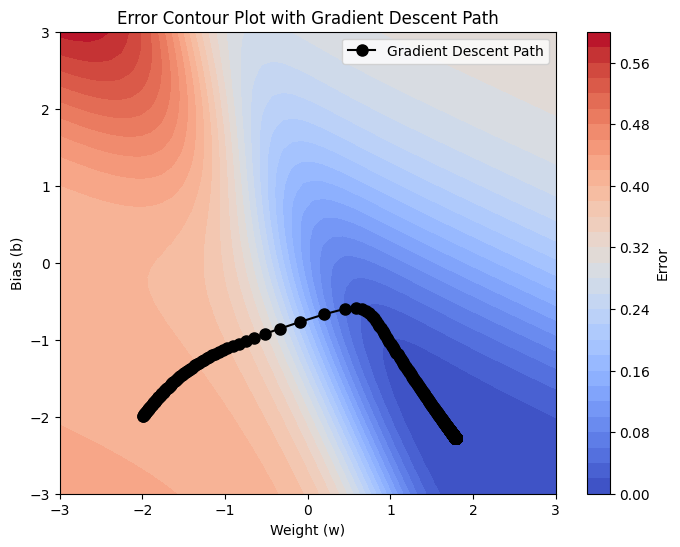

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = [0.5, 2.5]
Y = [0.2, 0.9]

def sigmoid(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = sigmoid(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w, b, x, y):
    fx = sigmoid(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = sigmoid(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

# Gradient Descent with Error Tracking
def do_gradient_descent():
    w, b, n, epochs = -2, -2, 1.0, 100000

    w_vals, b_vals, errors = [], [], []  # To store values for visualization

    for i in range(epochs):
        dw, db = 0, 0

        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        w = w - n * dw
        b = b - n * db

        w_vals.append(w)
        b_vals.append(b)
        errors.append(error(w, b))  # Store error for each step

    return w_vals, b_vals, errors

# Run Gradient Descent
w_vals, b_vals, errors = do_gradient_descent()

# # Plot Error vs Iterations
# plt.figure(figsize=(8, 5))
# plt.plot(errors, marker='o', linestyle='-', color='b')
# plt.xlabel("Iterations")
# plt.ylabel("Error")
# plt.title("Error Decrease over Iterations")
# plt.grid()
# plt.show()

# Contour Plot of Error Function with Gradient Descent Path
w_range = np.linspace(-3, 3, 50)
b_range = np.linspace(-3, 3, 50)
W, B = np.meshgrid(w_range, b_range)
Error = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Error[i, j] = error(W[i, j], B[i, j])

plt.figure(figsize=(8, 6))
plt.contourf(W, B, Error, levels=30, cmap='coolwarm')
plt.colorbar(label="Error")
plt.xlabel("Weight (w)")
plt.ylabel("Bias (b)")
plt.title("Error Contour Plot with Gradient Descent Path")

# Overlay the gradient descent path
plt.plot(w_vals, b_vals, marker='o', color='black', markersize=8, label="Gradient Descent Path")
plt.legend()
plt.show()
